In [1]:
%load_ext autoreload
%autoreload 2

import sys 
sys.path.append('/global/project/projectdirs/desi/mocks/bgs/MXXL/one_percent')
import footprint 
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
import mxxl_real
from astropy.table import Table
from corr_func_tools import calc_wtheta,create_axes

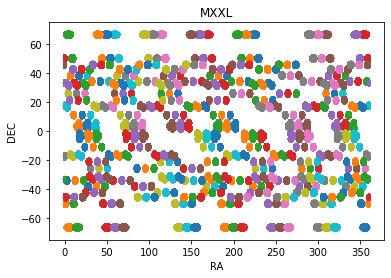

In [2]:
mxxl = mxxl_real.read_mxxl_real()
for i in range(36):
    mxxl_temp=mxxl[(mxxl['NMOCK']==i)]
    plt.scatter(mxxl_temp['RA'][:1000000], mxxl_temp['DEC'][:1000000],s=10, edgecolor="None")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('MXXL')

/global/homes/l/lbigwood/S4Mock/mxxl_real.py:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ra_array = np.array(ra_array)
/global/homes/l/lbigwood/S4Mock/mxxl_real.py:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dec_array = np.array(dec_array)
/global/homes/l/lbigwood/S4Mock/mxxl_real.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the 

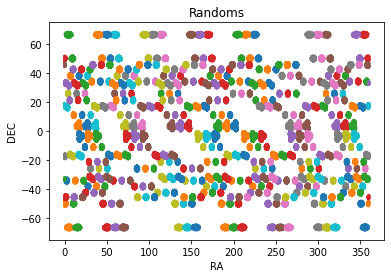

In [3]:
rand = mxxl_real.read_mxxl_real_rand()
for i in range(36):
    rand_temp=rand[(rand['NMOCK']==i)]
    plt.scatter(rand_temp['RA'][:1000000], rand_temp['DEC'][:1000000],s=10, edgecolor="None")
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.title('Randoms')

In [28]:
wtheta_all = []
for i in range(36):
    print(i)
    
    mxxl_n = mxxl[(mxxl['NMOCK']==i)]
    rand_n = rand[(rand['NMOCK']==i)]
    wtheta_all.append(calc_wtheta(mxxl_n,rand_n))
wtheta_all = np.c_[wtheta_all]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [36]:
np.save('wtheta_all',wtheta_all)

In [29]:
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

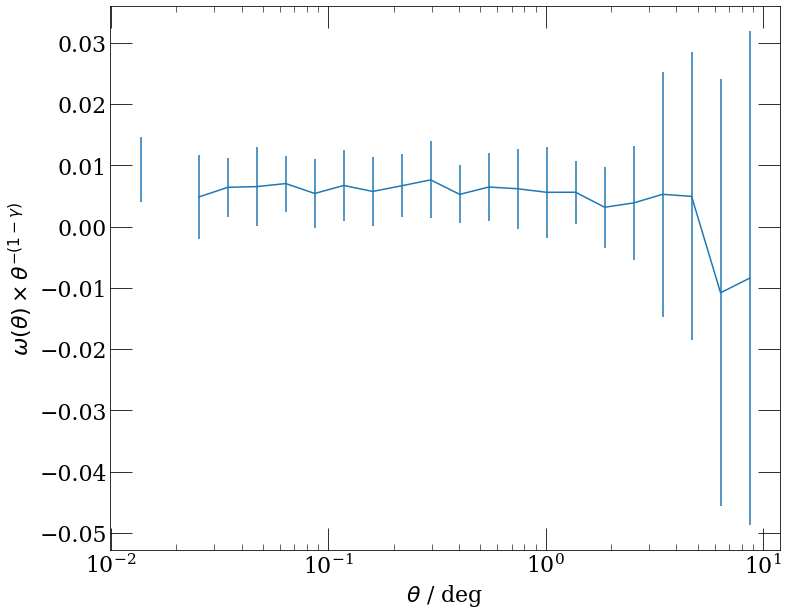

In [30]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

x_axis,y_axis = create_axes(mean)
x_axis,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis,y_axis,yerr=y_axis_err)

plt.xlabel(r'$\theta$ / deg')
plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xscale('log')
#plt.yscale('log')

In [9]:
mxxl_n = mxxl[(mxxl['NMOCK']==1)]
rand_n = rand[(rand['NMOCK']==1)]
p = calc_wtheta(mxxl_n,rand_n)

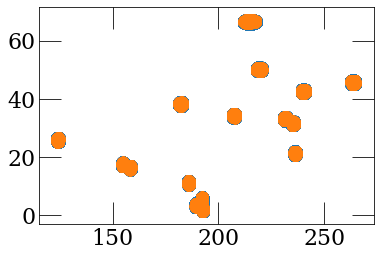

In [10]:
plt.scatter(mxxl_n['RA'],mxxl_n['DEC'])
plt.scatter(rand_n['RA'],rand_n['DEC'])

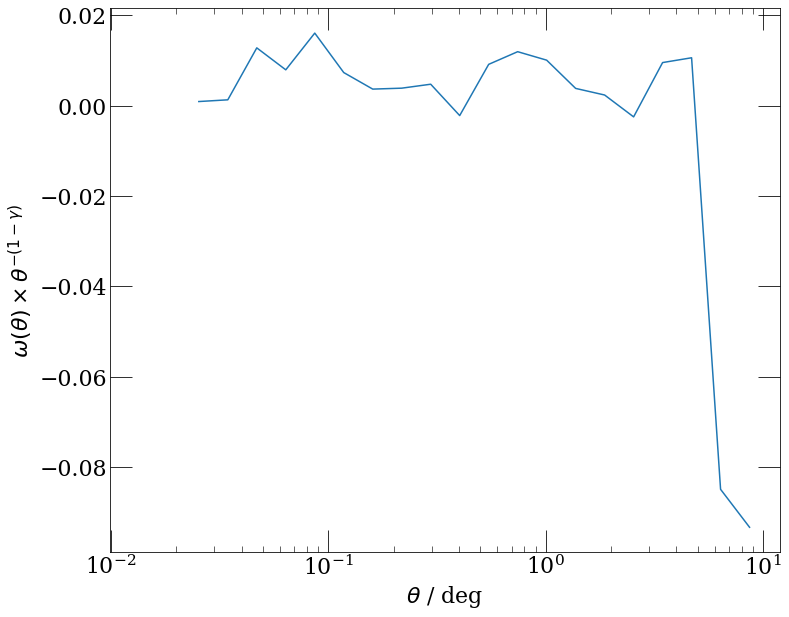

In [33]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

x_axis,y_axis = create_axes(wtheta_all[15])
plt.plot(x_axis,y_axis)#yerr=y_axis_err)

plt.xlabel(r'$\theta$ / deg')
plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xscale('log')
#plt.yscale('log')